In [1]:
#Pyvis
import pyvis
from pyvis.network import Network
import pandas as pd
import os

got_net = Network(height='950px', width='1600px')
#got_net = Network(height='400px', width='600px')

def addnode(name):
    imgpath = "img/" + name + ".jpg"
    itemimgpath = "img_item/" + name + ".jpg"
    if os.path.exists(imgpath):
        got_net.add_node(name, name, title=name, shape="circularImage", image=imgpath)
    elif os.path.exists(itemimgpath):
        got_net.add_node(name, name, title=name, shape="image", image=itemimgpath)
    else:
        got_net.add_node(name, name, title=name)

def loadcsv(url):
    got_data = pd.read_csv(url)

    sources = got_data['Source']
    targets = got_data['Target']
    details = got_data['Detail']

    edge_data = zip(sources, targets, details)

    for e in edge_data:
        src = e[0]
        dst = e[1]
        det = e[2]
        
        addnode(src)
        addnode(dst)

        if type(det) == float:
            got_net.add_edge(src, dst)
        elif det == "OFF":
            got_net.add_edge(src, dst, physics=False)
        else:
            got_net.add_edge(src, dst, title=det)
    
loadcsv("relation.csv")
loadcsv("relation_item.csv")

neighbor_map = got_net.get_adj_list()

for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

print(len(got_net.nodes))
print(len(got_net.edges))

#got_net.show_buttons()
got_net.set_options("""
var options = {
  "nodes": {
    "scaling": {
      "min": 10,
      "max": 28
    },
    "color": {
      "highlight": {
        "border": "rgba(37,45,168,1)",
        "background": "rgba(22,46,170,1)"
      }
    }
  },
  "edges": {
    "color": {
      "color": "rgba(255,191,132,1)",
      "highlight": "rgba(255,142,101,1)",
      "inherit": false,
      "opacity": 0.5
    },
    "smooth": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -45000,
      "centralGravity": 0
    },
    "minVelocity": 0.75
  },
  "layout":{
    "randomSeed":2
  }
}
""")

got_net.show('mcu.html')

753
2157


In [2]:
#NetworkX
import pandas as pd
import networkx as nx

G = nx.Graph()

def loadcsv_X(csvurl):
    data = pd.read_csv(csvurl)
    node1 = data['Source']
    node2 = data['Target']

    edgelist = zip(node1, node2)

    for e in edgelist:
        src = e[0]
        dst = e[1]
    
        G.add_node(src)
        G.add_node(dst)
        G.add_edge(src, dst)

loadcsv_X('relation.csv')
loadcsv_X('relation_item.csv')

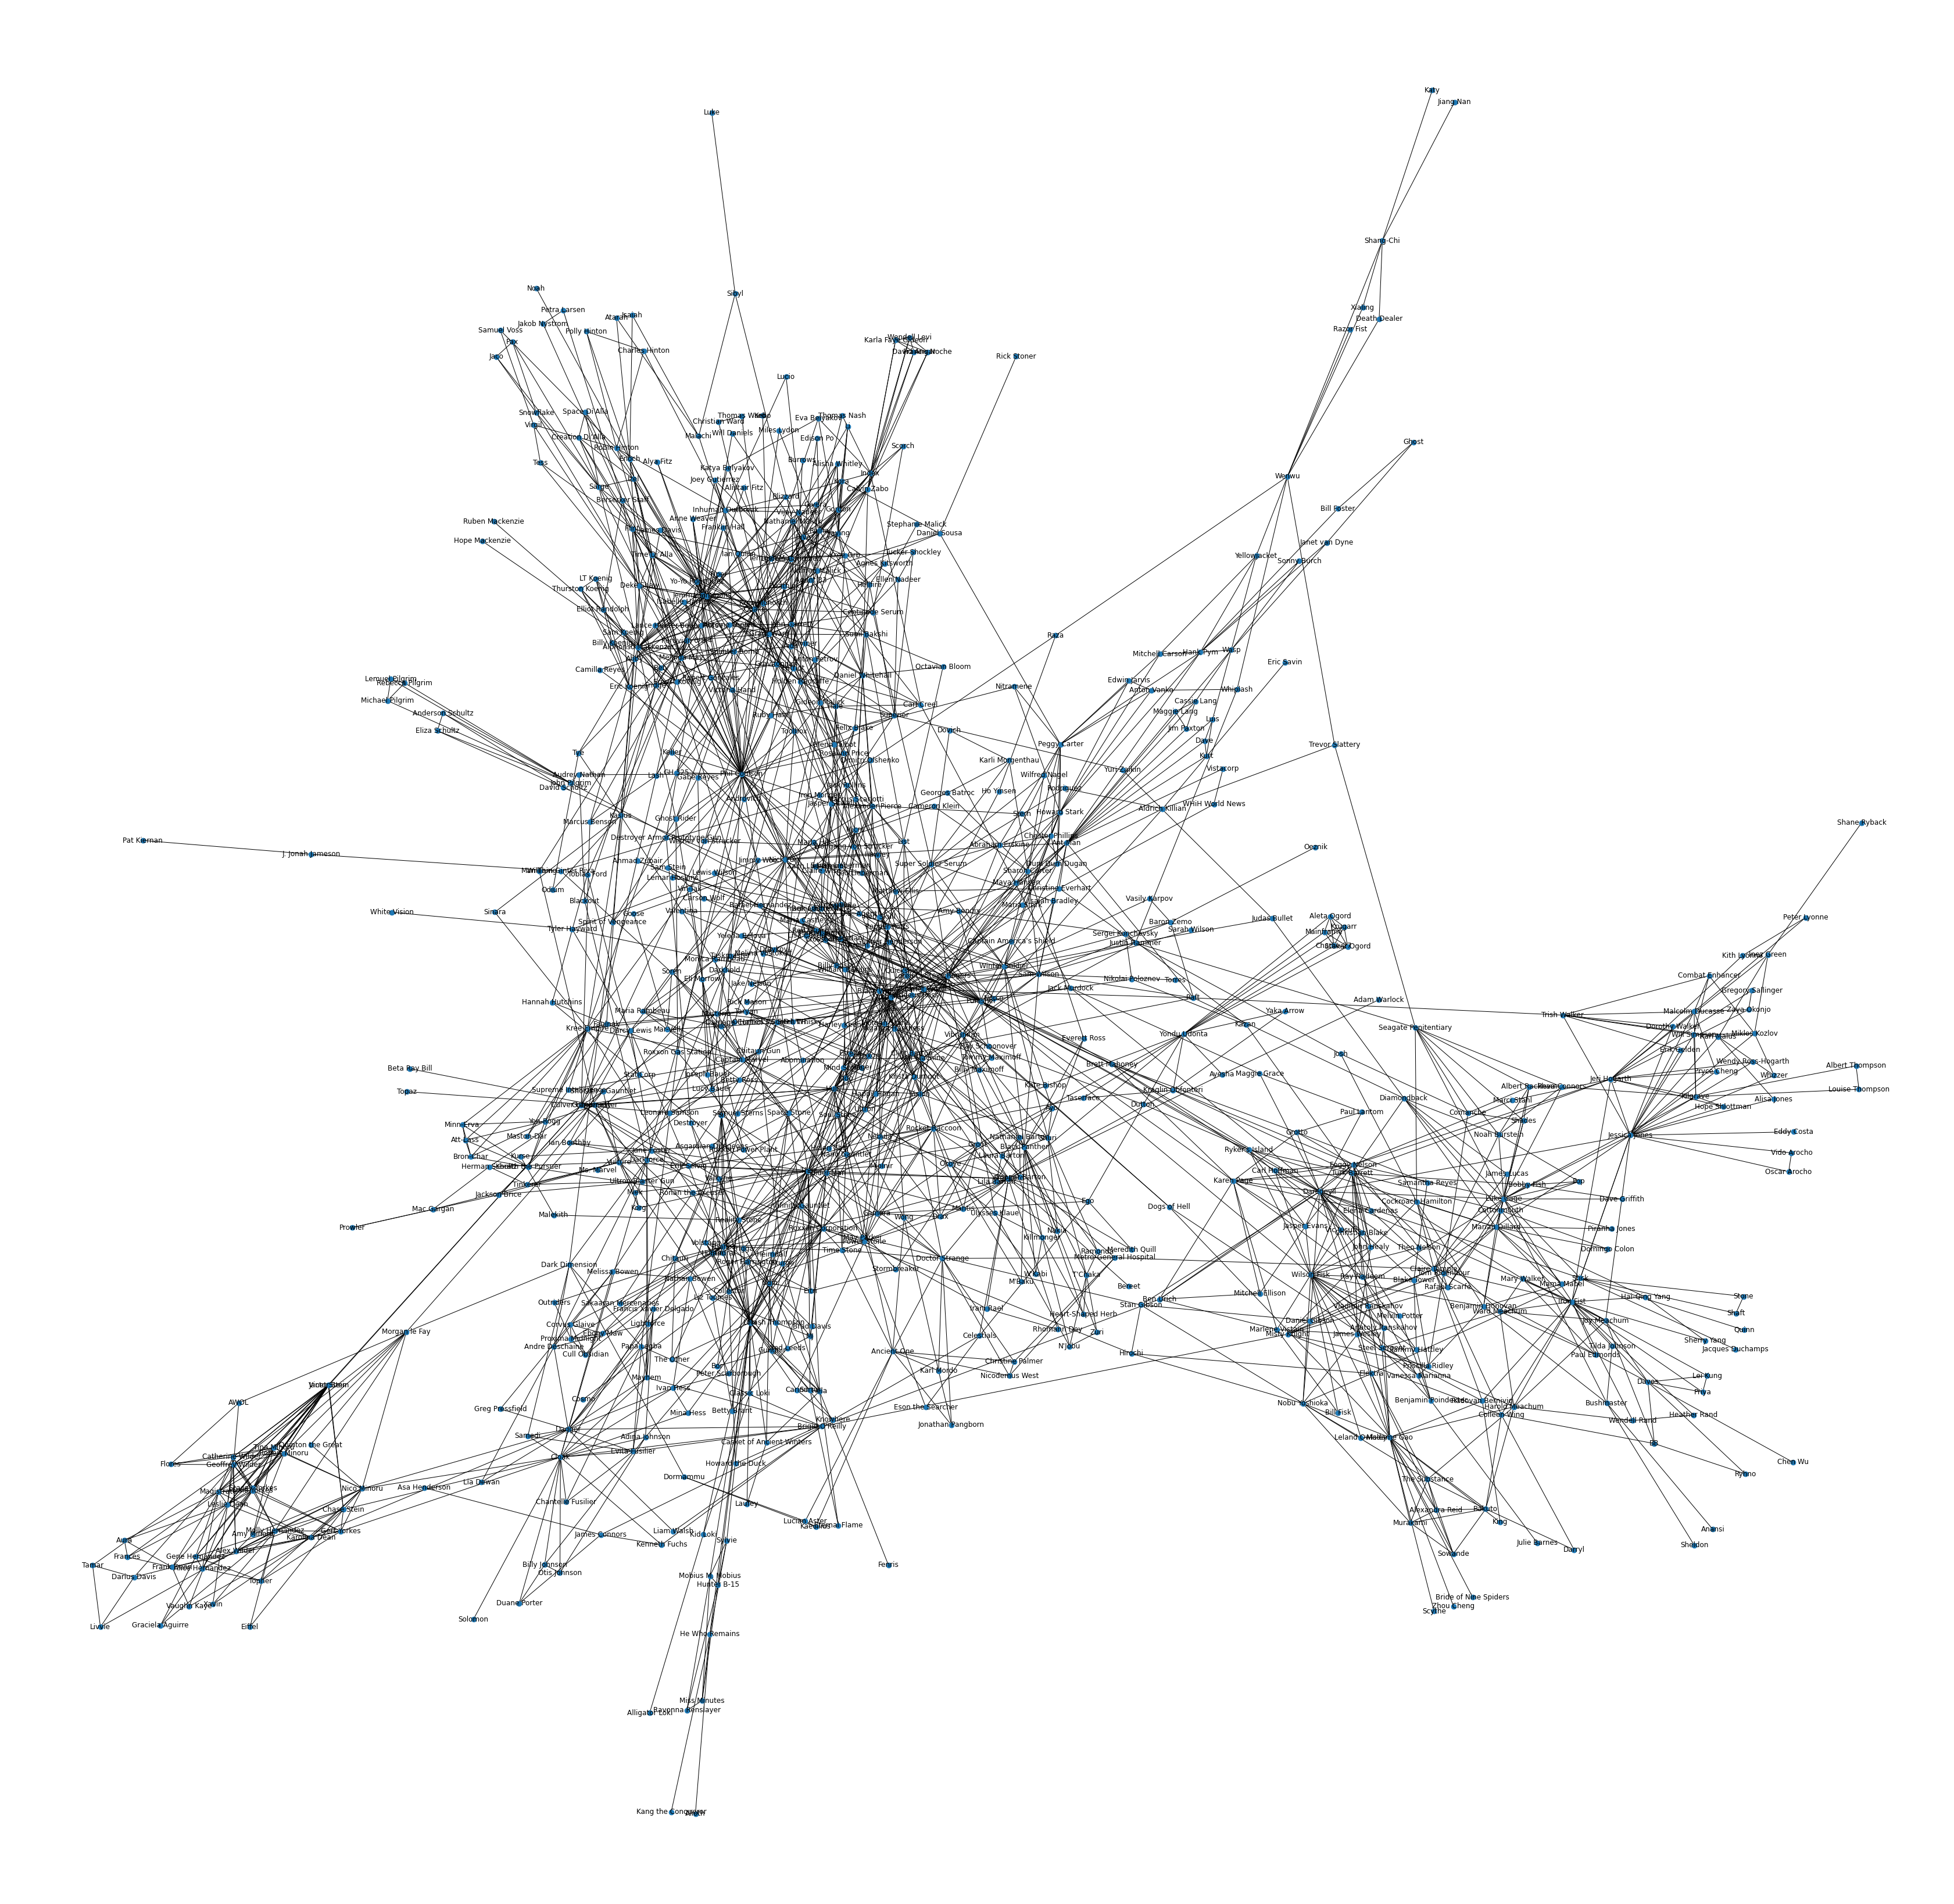

In [11]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
plt.figure(figsize=(60,60))
nx.draw_networkx(G, pos, with_labels=True, node_shape='.')
plt.axis("off")
plt.show()

In [12]:
#ネットワーク全体の分析
print("ノード数", G.number_of_nodes())
print("エッジ数", G.number_of_edges())
print("平均距離", nx.average_shortest_path_length(G))
print("クラスター係数", nx.average_clustering(G)) #各頂点のクラスター係数の平均：頂点のクラスター係数は隣接頂点2つを見て三角形ができる確率

ノード数 676
エッジ数 1995
平均距離 4.862857769011615
クラスター係数 0.4590303312417636


In [3]:
#pagerank
pr = nx.pagerank(G)

pagerankranking = sorted(G.nodes(), key=lambda x: pr[x], reverse=True)

for node in pagerankranking:
    print(pagerankranking.index(node)+1, node, pr[node])

1 Phil Coulson 0.008299834886764092
2 Terrigen Mist 0.007056192127850306
3 Iron Man 0.006826975468171099
4 Loki 0.006230787485700827
5 Jessica Jones 0.005925327466035357
6 Quake 0.005908521671220221
7 Thor 0.005875943881669369
8 Daredevil 0.00554906112545422
9 Peggy Carter 0.005428079678816832
10 Punisher 0.005337068882030798
11 Black Widow 0.00524426967268896
12 Grant Ward 0.004910856299345202
13 Kingpin 0.004805578456595391
14 Nick Fury 0.0047984059803296685
15 Luke Cage 0.0045915640890753446
16 Iron Fist 0.0045721614908007914
17 Steve Rogers 0.004510506474092232
18 Alphonso Mackenzie 0.004399907176855811
19 Jemma Simmons 0.004357237571293345
20 Hulk 0.004330008678893088
21 Madame Gao 0.0041841612729988445
22 Star-Lord 0.004182921527785067
23 Melinda May 0.004145084574900675
24 Cloak 0.004071429319212336
25 Clint Barton 0.0040361689825732
26 Roxxon Corporation 0.004012234855442625
27 Thanos 0.0039286073675603534
28 Jeri Hogarth 0.003912887128068221
29 Ant-Man 0.003826318460169596
30 

In [16]:
#固有ベクトル中心性
ev_centers = nx.eigenvector_centrality_numpy(G)

evcranking = sorted(G.nodes(), key=lambda x: ev_centers[x], reverse=True)

for node in evcranking:
    print(evcranking.index(node)+1, node, ev_centers[node])

1 Phil Coulson 0.34172775193199306
2 Quake 0.2475918577861442
3 Jemma Simmons 0.20748432130210342
4 Leo Fitz 0.19847993330145206
5 Iron Man 0.19649236831749115
6 Melinda May 0.19464825848956374
7 Alphonso Mackenzie 0.18774452989216778
8 Grant Ward 0.1786489915841136
9 Black Widow 0.17836158823748663
10 Nick Fury 0.15815098195300673
11 Thor 0.15812404216579068
12 Time Di'Alla 0.15274331136977073
13 Steve Rogers 0.1462866497357319
14 Clint Barton 0.14161792669718123
15 Deke Shaw 0.1318356047502886
16 Hulk 0.12023521564319731
17 John Garrett 0.11226406798665119
18 Yo-Yo Rodriguez 0.1098005279382686
19 Deathlok 0.09584314507009035
20 Bobbi Morse 0.09158991423548551
21 Lincoln Campbell 0.08961304305408141
22 Kree Monolith 0.08844429951907326
23 Raina 0.08795705404201774
24 War Machine 0.08745821542906221
25 Antoine Triplett 0.0859657923774924
26 Lance Hunter 0.08355850475669863
27 Vision 0.08225989719330723
28 Patriot 0.08162774331175725
29 Rocket Raccoon 0.0806183036171955
30 Nebula 0.0793

In [15]:
#媒介中心性（任意の二点間の最短距離上への存在確率、最短経路が複数ある場合は"通る最短経路数/最短経路数"）
between_centers = nx.betweenness_centrality(G)

bcranking = sorted(G.nodes(), key=lambda x: between_centers[x], reverse=True)

for node in bcranking:
    print(bcranking.index(node)+1, node, between_centers[node])

1 Phil Coulson 0.18201565598767297
2 Quake 0.097570407748825
3 Punisher 0.09731510522699754
4 Iron Man 0.09493668557870959
5 Raft 0.08725910786409731
6 Daredevil 0.07784871153130356
7 Clint Barton 0.07780640046842746
8 Thor 0.07671315890640758
9 Black Widow 0.07438612357672786
10 Micro 0.06387628977537606
11 Loki 0.05391097226171537
12 Culver University 0.052912308532668845
13 Doctor Strange 0.052879265269424554
14 Luke Cage 0.05158137549269111
15 Hulk 0.05130713328970664
16 O'Harren's Scotch Whisky 0.05090052587951379
17 Claire Temple 0.050094057786450485
18 Diamondback 0.04945915795298962
19 Metro-General Hospital 0.047564690247321156
20 Nick Fury 0.04715666974622552
21 Ant-Man 0.044944705176479104
22 Gideon Malick 0.04399779899379047
23 Justin Hammer 0.04196532200737656
24 Grant Ward 0.0412202775632615
25 Roxxon Corporation 0.04099783156238794
26 Jessica Jones 0.03866752483404467
27 Star-Lord 0.038388170540252654
28 Scarlet Witch 0.03746524498662197
29 Trish Walker 0.037280606685026

In [32]:
#次数中心性（次数/(n-1)）
degree_centers = nx.degree_centrality(G)

dcranking = sorted(G.nodes(), key=lambda x: degree_centers[x], reverse=True)

for node in dcranking:
    print(dcranking.index(node)+1, node, degree_centers[node])

1 Phil Coulson 0.07583774250440917
2 Iron Man 0.06172839506172839
3 Thor 0.0564373897707231
4 Quake 0.0564373897707231
5 Loki 0.04938271604938271
6 Black Widow 0.047619047619047616
7 Daredevil 0.047619047619047616
8 Steve Rogers 0.04585537918871252
9 Jemma Simmons 0.04585537918871252
10 Grant Ward 0.04409171075837742
11 Nick Fury 0.04056437389770723
12 Leo Fitz 0.04056437389770723
13 Punisher 0.04056437389770723
14 Kingpin 0.04056437389770723
15 Alphonso Mackenzie 0.03880070546737213
16 Melinda May 0.037037037037037035
17 Jessica Jones 0.037037037037037035
18 Luke Cage 0.037037037037037035
19 Hulk 0.03527336860670194
20 Clint Barton 0.03527336860670194
21 Thanos 0.03527336860670194
22 Iron Fist 0.03527336860670194
23 Madame Gao 0.03350970017636684
24 Captain Marvel 0.031746031746031744
25 John Garrett 0.031746031746031744
26 Black Panther 0.029982363315696647
27 Spider-Man 0.029982363315696647
28 Star-Lord 0.029982363315696647
29 Scarlet Witch 0.02821869488536155
30 Gideon Malick 0.028

In [14]:
#次数
dranking = sorted(G.nodes(), key=lambda x: G.degree[x], reverse=True)

for node in dranking:
    print(dranking.index(node)+1, node, G.degree[node])

1 Phil Coulson 45
2 Iron Man 35
3 Quake 34
4 Thor 31
5 Loki 29
6 Black Widow 28
7 Daredevil 27
8 Jemma Simmons 26
9 Steve Rogers 25
10 Nick Fury 25
11 Grant Ward 25
12 Punisher 25
13 Leo Fitz 24
14 Hulk 23
15 Wilson Fisk 23
16 Melinda May 22
17 Alphonso Mackenzie 22
18 Jessica Jones 22
19 Clint Barton 21
20 Luke Cage 21
21 Thanos 20
22 Star-Lord 20
23 Iron Fist 20
24 John Garrett 19
25 Madame Gao 19
26 Cloak 19
27 Black Panther 18
28 Spider-Man 18
29 Terrigen Mist 18
30 Ant-Man 17
31 Winter Soldier 17
32 Gideon Malick 17
33 Sam Wilson 16
34 Scarlet Witch 16
35 Captain Marvel 16
36 Raina 16
37 Dagger 16
38 Rocket Raccoon 15
39 Jiaying 15
40 Claire Temple 15
41 Turk Barrett 15
42 Geoffrey Wilder 15
43 Leslie Dean 15
44 Magistrate 15
45 Kree Empire 15
46 Vision 14
47 Deke Shaw 14
48 Howard Stark 14
49 Foggy Nelson 14
50 Jeri Hogarth 14
51 Molly Hernandez 14
52 Power Stone 14
53 Time Di'Alla 14
54 Roxxon Corporation 14
55 Index 14
56 War Machine 13
57 Nebula 13
58 Daniel Whitehall 13
59 Yo

In [122]:
#Girvan-Newman法でコミュニティ解析（媒介中心性の高い辺から切断していく）
import itertools
k = 5
comp = nx.algorithms.community.centrality.girvan_newman(G)

for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

(['Abby', 'Abomination', 'Abraham Erskine', 'Absorbing Man', 'Adam Warlock', 'Agatha Harkness', 'Agent 33', 'Aida', 'Aldrich Killian', 'Aleta Ogord', 'Alexander Pierce', 'Alioth', 'Alisha Whitley', 'Alistair Fitz', 'Alphonso Mackenzie', 'Alya Fitz', 'Ancient One', 'Androvich', 'Anne Weaver', 'Ant-Man', 'Antoine Triplett', 'Anton Vanko', 'Arnim Zola', 'Atarah', 'Att-Lass', 'Ayesha', 'Ayo', 'Baron Zemo', 'Ben', 'Benjamin Pollack', 'Beta Ray Bill', 'Betty Brant', 'Betty Ross', 'Bill Foster', 'Billy Koenig', 'Billy Maximoff', 'Black Panther', 'Black Widow', 'Blackout', 'Blizzard', 'Bobbi Morse', 'Bor', 'Bron-Char', 'Bucky Barnes', 'Burrows', 'Calvin Zabo', 'Cameron Klein', 'Captain Marvel', 'Carina', 'Cassie Lang', 'Charles Hinton', 'Charlie-27', 'Chester Phillips', 'Christian Ward', 'Christine Palmer', 'Claire Wise', 'Classic Loki', 'Clint Barton', 'Collector', 'Cooper Barton', 'Corvus Glaive', 'Crixon', 'Crossbones', 'Cull Obsidian', 'Daniel Sousa', 'Daniel Whitehall', 'Darcy Lewis', 'Da

(['Abomination', 'Abraham Erskine', 'Agatha Harkness', 'Ant-Man', 'Anton Vanko', 'Att-Lass', 'Ayo', 'Baron Zemo', 'Betty Brant', 'Betty Ross', 'Bill Foster', 'Billy Maximoff', 'Black Panther', 'Black Widow', 'Bron-Char', 'Bucky Barnes', 'Captain Marvel', 'Cassie Lang', 'Chester Phillips', 'Clint Barton', 'Cooper Barton', 'Corvus Glaive', 'Crossbones', 'Cull Obsidian', 'Darcy Lewis', 'Dave', 'Death Dealer', 'Dreykov', 'Dum Dum Dugan', 'Ebony Maw', 'Edwin Jarvis', 'Everett Ross', 'Ghost', 'Hank Pym', 'Happy Hogan', 'Harley Keener', 'Helen Cho', 'Ho Yinsen', 'Howard Stark', 'Hulk', 'Iron Man', 'Iron Monger', 'Isaiah Bradley', 'J. Jonah Jameson', 'Jack Rollins', 'Janet van Dyne', 'Jiang Nan', 'Jim Paxton', 'Jimmy Woo', 'Justin Hammer', 'Kate Bishop', 'Katy', 'Killmonger', 'Korath the Pursuer', 'Kurt', 'Laura Barton', 'Lemar Hoskins', 'Lila Barton', 'Liz Toomes', 'Luis', "M'Baku", 'MJ', 'Mac Gargan', 'Maggie Lang', 'Mar-Vell', 'Maria Rambeau', 'Maria Stark', 'May Parker', 'Melina Vostokoff'

(['Abomination', 'Abraham Erskine', 'Agatha Harkness', 'Ant-Man', 'Anton Vanko', 'Ayo', 'Baron Zemo', 'Betty Brant', 'Betty Ross', 'Bill Foster', 'Billy Maximoff', 'Black Panther', 'Black Widow', 'Bucky Barnes', 'Cassie Lang', 'Chester Phillips', 'Clint Barton', 'Cooper Barton', 'Crossbones', 'Darcy Lewis', 'Dave', 'Death Dealer', 'Dreykov', 'Dum Dum Dugan', 'Edwin Jarvis', 'Everett Ross', 'Ghost', 'Hank Pym', 'Happy Hogan', 'Harley Keener', 'Helen Cho', 'Ho Yinsen', 'Howard Stark', 'Hulk', 'Iron Man', 'Iron Monger', 'Isaiah Bradley', 'J. Jonah Jameson', 'Jack Rollins', 'Janet van Dyne', 'Jiang Nan', 'Jim Paxton', 'Jimmy Woo', 'Justin Hammer', 'Kate Bishop', 'Katy', 'Killmonger', 'Kurt', 'Laura Barton', 'Lemar Hoskins', 'Lila Barton', 'Liz Toomes', 'Luis', "M'Baku", 'MJ', 'Mac Gargan', 'Maggie Lang', 'Maria Stark', 'May Parker', 'Melina Vostokoff', 'Monica Rambeau', 'Morgan Stark', 'Mysterio', "N'Jobu", 'Nakia', 'Nathaniel Barton', 'Nebula', 'Ned Leeds', 'Nomble', 'Oeznik', 'Okoye', 'P